# Task
We have been asked to use our hypothesis testing skills to answer the following questions:

- Q1. Do smokers have higher insurance charges than non-smokers?
- Q2. Are men more likely to smoke than women?
- Q3. Do different regions have different charges, on average?

For each question, make sure to:

- State your Null Hypothesis and Alternative Hypothesis
- Select the correct test according to the data type and number of samples
- Test the assumptions of your selected test.
- Execute the selected test, or the alternative test (if you do not meet the assumptions)
- Interpret your p-value and reject or fail to reject your null hypothesis 
- Show a supporting visualization that helps display the result





In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import pandas as pd
import os
os.makedirs('Data/',exist_ok=True) 
os.listdir('Data')
df=pd.read_csv('Data/insurance - insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Q1. Do smokers have higher insurance charges than non-smokers?
- Hypotheses
    - null: there is not higher charges between smoker/non-smoker
    - alternative:there is a significant difference in charges between smokers/non-smokers
    
- test selection: 2 sample T test(numeric data between 2 samples )

- aplha:0.05

In [31]:
smoker = df.loc[ df['smoker']=='yes'].copy()
not_smoker = df.loc[ df['smoker']=='no'].copy()
smoker_charge= smoker['charges']
non_smoker_charge= not_smoker['charges']

In [32]:
# Check for outliers in smokers
zscores= stats.zscore(smoker_charge)
outliers = abs(zscores)>3
np.sum(outliers)



0

In [41]:
zscores= stats.zscore(non_smoker_charge)
outliers = abs(zscores)>3
np.sum(outliers)

0

In [37]:
# remove outlier 
non_smoker_charge = non_smoker_charge[(np.abs(stats.zscore(non_smoker_charge)) < 3)]







In [39]:
# test normality
smoker_charge = stats.normaltest(smoker_charge)
smoker_charge


NormaltestResult(statistic=61.03941356533816, pvalue=5.564930630036463e-14)

In [40]:
# test normality
non_smoker_charge = stats.normaltest(non_smoker_charge)
non_smoker_charge


NormaltestResult(statistic=163.80367047789198, pvalue=2.6945416315543976e-36)

In [42]:
result = stats.ttest_ind(smoker_charge, non_smoker_charge, equal_var = False)
result

Ttest_indResult(statistic=-0.5878729993217828, pvalue=0.6437133424788231)

p value > .05 reject null plot below relates

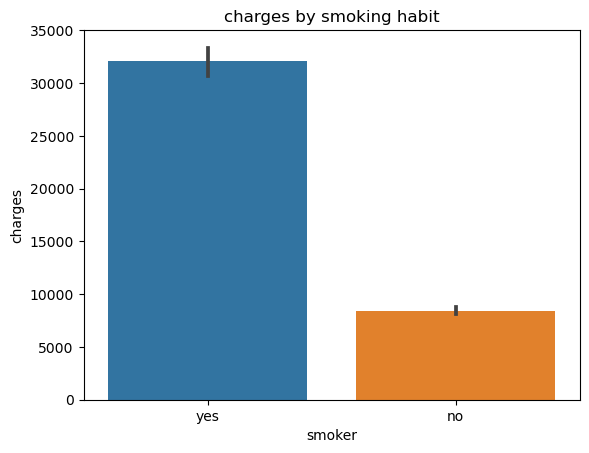

In [47]:
ax= sns.barplot(data=df, x='smoker',y='charges');
ax.set_title("charges by smoking habit");

# Q2. Are men more likely to smoke than women?
- Hypotheses
    - null: men are no more likely than women to smoke
    - alternative: men are more likely to smoke than women
    
- test selection: Chi-square(categorical,between 2 samples)

- aplha:0.05

In [24]:
table = pd.crosstab(df['sex'], df['smoker'])
table

smoker,no,yes
sex,,
female,547,115
male,517,159


In [25]:
result = stats.chi2_contingency(table)
chi2, p, deg_free, expected_vals = result 

In [26]:
print(p)
p<.05

0.006548143503580696


True

p value lower than .05 reject null hypothesis

plot below relates the insignificant difference between sex and smoker status



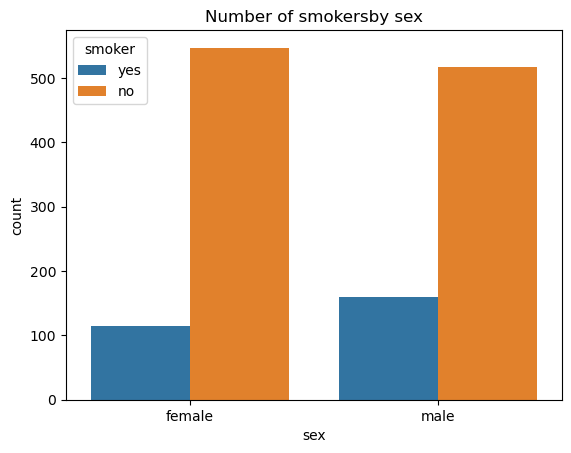

In [27]:
ax = sns.countplot(data=df, x='sex',hue='smoker',)
ax.set_title("Number of smokersby sex");

# Q3. Do different regions have different charges, on average?
- Hypotheses
    - null: regions do not vary on charges.
    - alternative:charges vary depending on region.
    
    
- test selection: ANNOVA(4 groups with possible significant differences)

- aplha:0.05
    
    
   

In [16]:
groups = {}
## Loop through all unique categories
for i in df['region'].unique():
    ## Get series for group and rename
    data = df.loc[df['region']==i,'charges'].copy()
    
    # save into the dictionary
    groups[i] = data
groups.keys()

dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

In [18]:
## Running normal test on each group and confirming there are >20 in each group
norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    ## save the p val, test statistic, and the size of the group
    norm_results[i] = {'n': len(data),
                             'p':p,
                             'test stat':stat,}
## convert to a dataframe
norm_results_df['sig'] = norm_results_df['p'] < .05 
norm_results_df

,n,p,test stat,sig
southwest,325.0,6.125298e-23,102.294059,True
southeast,364.0,4.953297e-15,65.877446,True
northwest,325.0,5.184209e-24,107.232850,True
northeast,324.0,1.455431e-19,86.747629,True


In [20]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
## save the values as kg_lost and the labels to the Diet
values = df['charges']
labels = df['region']

In [21]:
tukeys_results = pairwise_tukeyhsd(values,labels)
tukeys_results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
northeast,northwest,-988.8091,0.7245,-3428.9343,1451.3161,False
northeast,southeast,1329.0269,0.4745,-1044.9417,3702.9955,False
northeast,southwest,-1059.4471,0.6792,-3499.5723,1380.6781,False
northwest,southeast,2317.8361,0.0583,-54.1994,4689.8716,False
northwest,southwest,-70.638,0.9999,-2508.8826,2367.6066,False
southeast,southwest,-2388.4741,0.0477,-4760.5096,-16.4386,True


reject null on significant difference between SE/SW charges
plot below supports southeast having the highest charges, while not having a significant difference between the other 2 groups, was still a significant change in value between the lowest charging region.

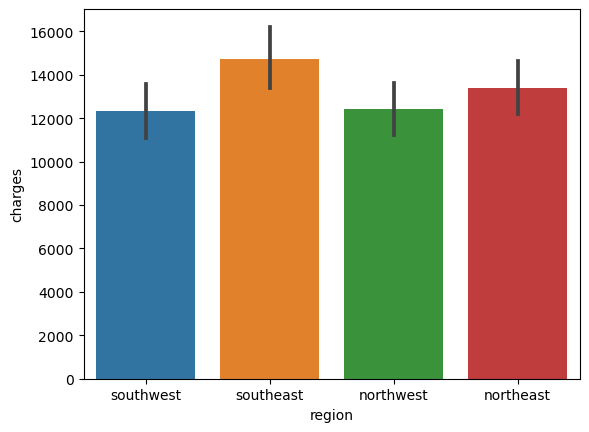

In [22]:
sns.barplot(data=df, x='region',y='charges');